In [1]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [3]:
# Code for pitch dimensions
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [4]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [7]:
#pitch = Pitch(pitch_type = 'statsbomb', pitch_color='#38383b',line_color='white', constrained_layout=False, tight_layout=True,view='full')

In [8]:
# a function to draw the pitch, and plot the passes on the pitch, split complete & incomplete passes
# based on a player's passes in a competition


def playerpasses(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 0:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        

# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='completed passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [9]:
# a function to draw the pitch, and plot the passes on the pitch, split in halves
# based on a player's passes in a competition


def playerpasses_inhalves(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
   
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['period'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['period'] == 2:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        
                             

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='first half')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='second half')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [10]:
# a function to draw the pitch, and plot the passes on the pitch, split complete & incomplete passes
# based on a team's passes in a competition


def teampasses(team_id,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    
    for i,thepass in comp.iterrows():
        if thepass['possession_team_id']==team_id and thepass['pass_outcome_Complete'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['possession_team_id']==team_id and thepass['pass_outcome_Complete'] == 0:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        

# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='completed passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [11]:
# a function to draw the pitch, and plot the passes on the pitch, split in halves
# based on a team's passes in a competition


def teampasses_inhalves(team_id,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['possession_team_id']==team_id and thepass['period'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['possession_team_id']==team_id and thepass['period'] == 2:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        
                             

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='first half')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='second half')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [13]:
#865 is the England Women's Team
glossary_wc = wc19[wc19['possession_team_id'] == 865]

In [69]:
# 3,808 passes, 3,199 completed (84%)
glossary_wc.pass_outcome_Complete.value_counts()

1    3199
0     609
Name: pass_outcome_Complete, dtype: int64

In [15]:
# glossary of all the players involved in World Cup 19
pd.set_option('display.max_rows', None)
glossary_wc['player'].unique()

array(['Ellen White', 'Francesca Kirby', 'Lucy Bronze', 'Nikita Parris',
       'Jade Moore', 'Bethany Mead', 'Alex Greenwood',
       'Magdalena Lilly Eriksson', 'Eva Sofia Jakobsson',
       'Carly Mitchell Telford', 'Abbie McManus', 'Jill Scott',
       'Stephanie Houghton', 'Sara Caroline Seger', 'Fridolina Rolfö',
       'Hanna Erica Maria Glas', 'Kosovare Asllani', 'Gun Nathalie Björn',
       'Rut Hedvig Lindahl', 'Linda Brigitta Sembrant', 'Jodie Taylor',
       'Lina Mona Andréa Hurtig', 'Karen Julia Carney', 'Nilla Fischer',
       'Rachel Daly', 'Emma Stina Blackstenius', 'Millie Bright',
       'Karen Bardsley', 'Keira Walsh', 'Kim Little', 'Caroline Weir',
       'Christie Murray', 'Nicola Docherty', 'Jennifer Patricia Beattie',
       'Sophie Howard', 'Claire Emslie', 'Lisa Evans', 'Georgia Stanway',
       'Kirsty Smith', 'Demi Stokes', 'Kumi Yokoyama', 'Toni Duggan',
       'Nana Ichise', 'Ayaka Yamashita', 'Jun Endo', 'Aya Sameshima',
       'Emi Nakajima', 'Hina Sugit

In [72]:
#create glossary of player name and player_id for easy reference
for_ref = wc19.groupby(['player', 'player_id']).count()

In [73]:
for_ref

period  pass_angle  \
player                                 player_id                       
Abbie McManus                          4648.0        197         197   
Abby Dahlkemper                        5081.0        366         366   
Abby Erceg                             5037.0         78          78   
Adriana Kristina Leon                  8297.0         16          16   
Adriana María Sachs                    25768.0        26          26   
Agustina Barroso Basualdo              25629.0        48          48   
Ainon Phancha                          25679.0        62          62   
Aitana Bonmati Conca                   15284.0        40          40   
Aivi Belinda Kerstin Luik              25850.0         9           9   
Ajara Nchout                           25628.0        85          85   
Alanna Stephanie Kennedy               5078.0        309         309   
Aldana Cometti                         25634.0        58          58   
Alex Greenwood                         10252.0       277         277   
Alexandra Morgan Carrasco              5085.0        109         109   
Alexandra Popp                         15178.0       138         138   
Alexandra Riley                        21062.0       142         142   
Alexandra Takounda Engolo              26096.0        25          25   
Alexia Putellas Segura                 10143.0       128         128   
Ali Krieger                            5089.0        110         110   
Alia Guagni                            10213.0       199         199   
Alice Ogebe                            26155.0         3           3   
Allie Long                             5001.0         20          20   
Allysha Lyn Chapman                    5038.0        148         148   
Allyson Swaby                          25545.0        79          79   
Almuth Schult                          10257.0       204         204   
Alyssa Michele Naeher                  5100.0        139         139   
Amalie Vevle Eikeland                  26570.0         4           4   
Amanda Ilestedt                        26092.0        39          39   
Amanda Mthandi                         25518.0        14          14   
Amanda Sampedro Bustos                 10154.0        34          34   
Amandine Henry                         10123.0       241         241   
Amel Majri                             15249.0       312         312   
Anam Imo                               25715.0         5           5   
Andile Dlamini                         25515.0        69          69   
Andrea Sánchez Falcón                  25842.0        19          19   
Andressa Alves da Silva                24368.0        68          68   
Andressa Cavalari Machry               5018.0         62          62   
Anna Anvegård                          25698.0        39          39   
Anna Green                             25784.0        36          36   
Annalie Longo                          25660.0        26          26   
Annamaria Serturini                    26585.0         4           4   
Annette Ngo                            25620.0        70          70   
Anouk Dekker                           10652.0       127         127   
Ashley Elizabeth Marie Lawrence        15290.0       229         229   
Asisat Lamina Oshoala                  24881.0        47          47   
Augustine Sylvia Ejangue Siliki        26097.0        66          66   
Aurora Galli                           10225.0        89          89   
Aya Sameshima                          25636.0       251         251   
Ayaka Yamashita                        25627.0        97          97   
Bambanani Nolufefe Mbane               25747.0        26          26   
Barbara Bonansea                       10211.0        97          97   
Beatriz Zaneratto João                 25561.0        52          52   
Bethany Mead                           15619.0       108         108   
Betsy Hassett                          25663.0        59          59   
Bo-Ram Hwang      

### Pre Modelling EDA - England Womens passing in WC19

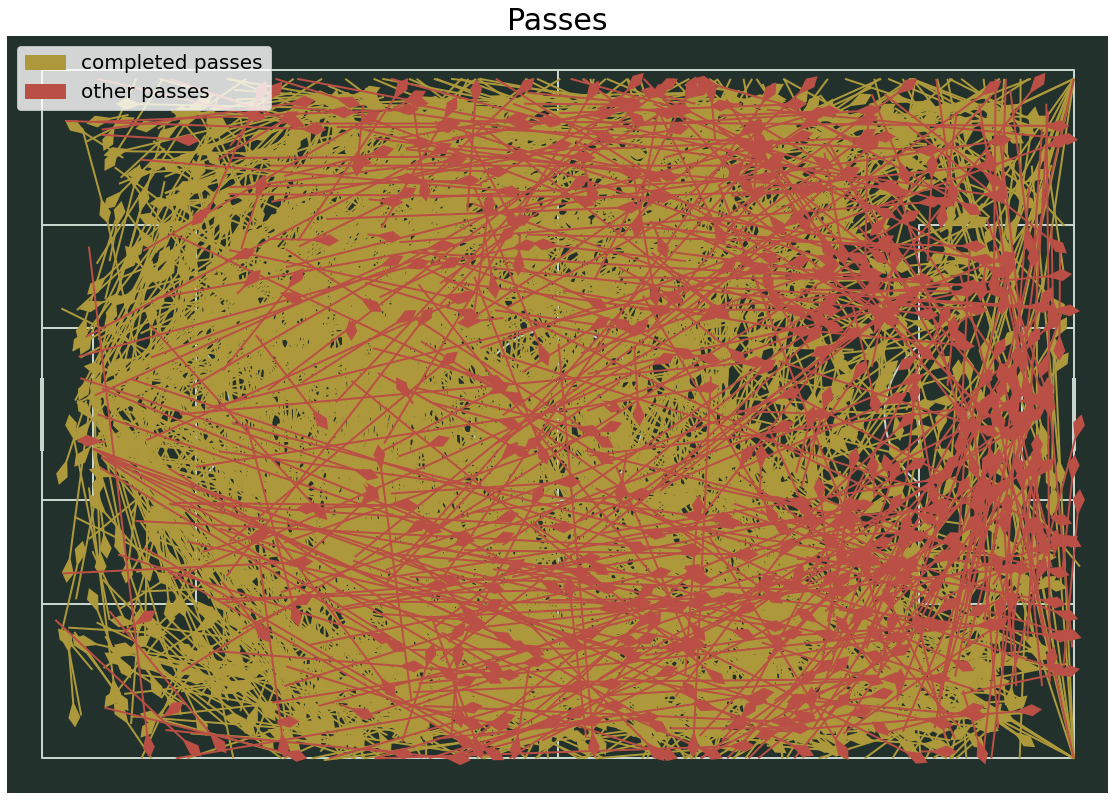

In [76]:
teampasses(865,wc19)

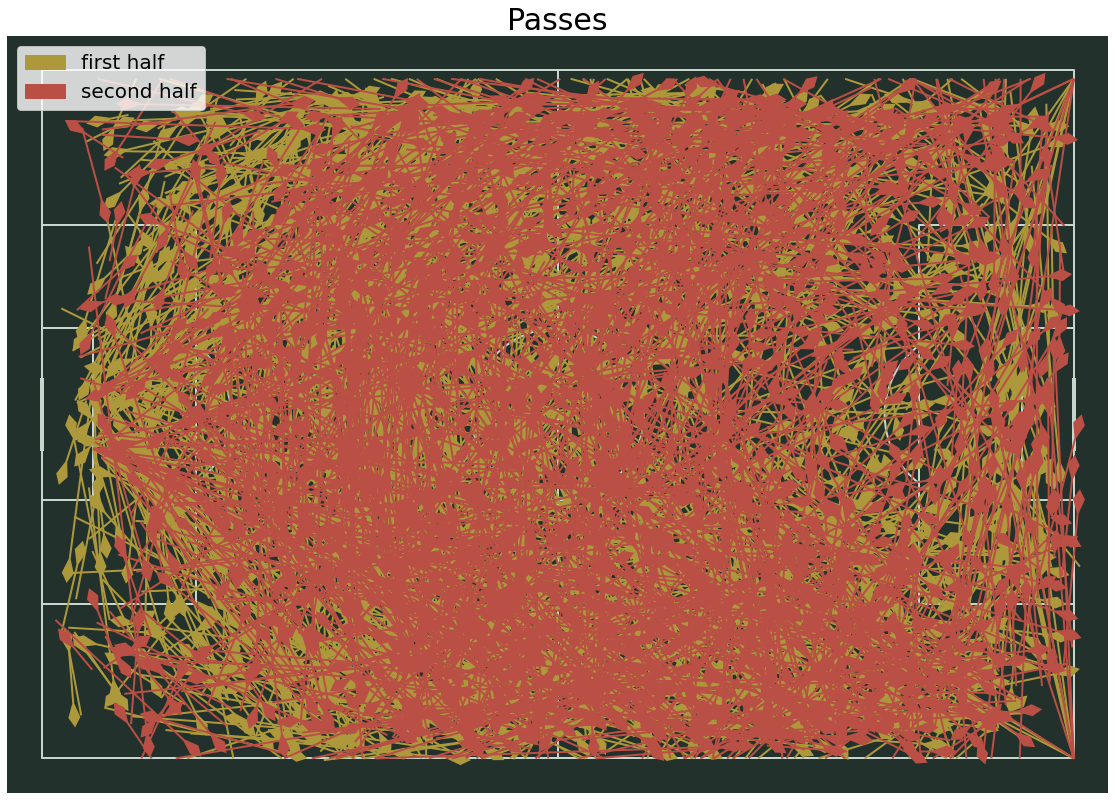

In [77]:
teampasses_inhalves(865,wc19)

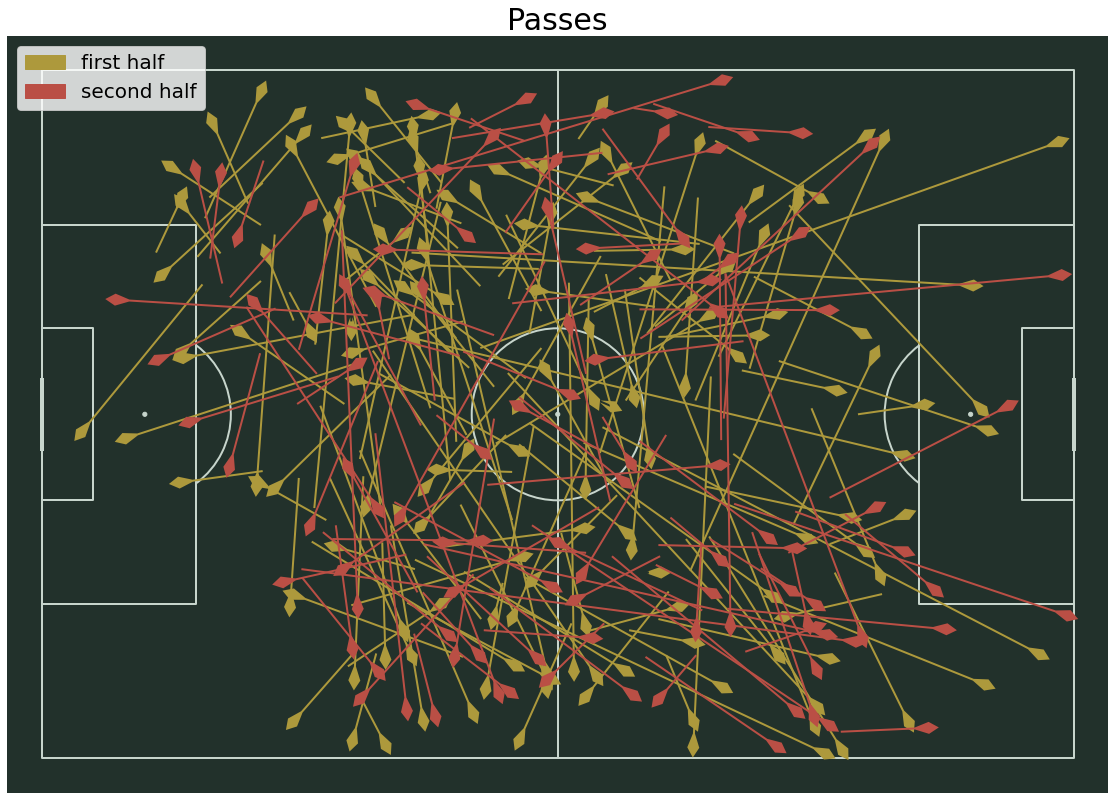

In [24]:
playerpasses_inhalves('Keira Walsh',wc19)

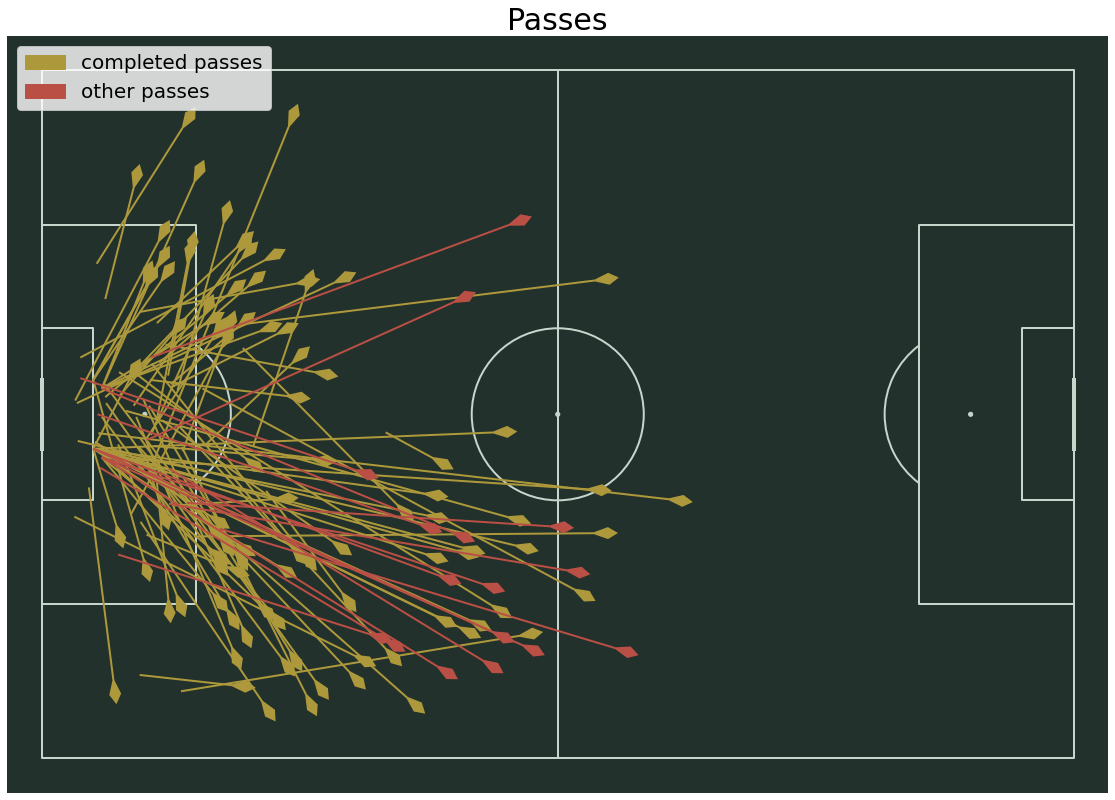

In [75]:
# Keeper for England, passes appear very right sided
playerpasses('Karen Bardsley',wc19)

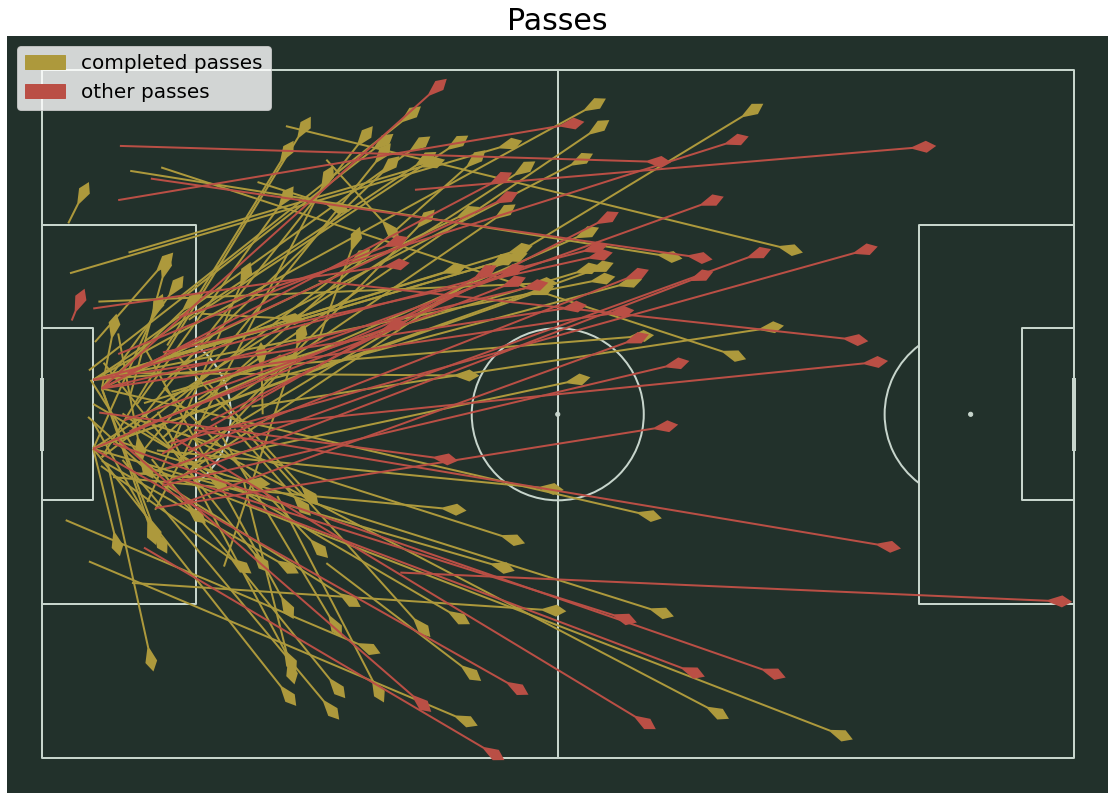

In [74]:
# Keeper for USA (who won the world cup 2019)
playerpasses('Alyssa Michele Naeher',wc19)

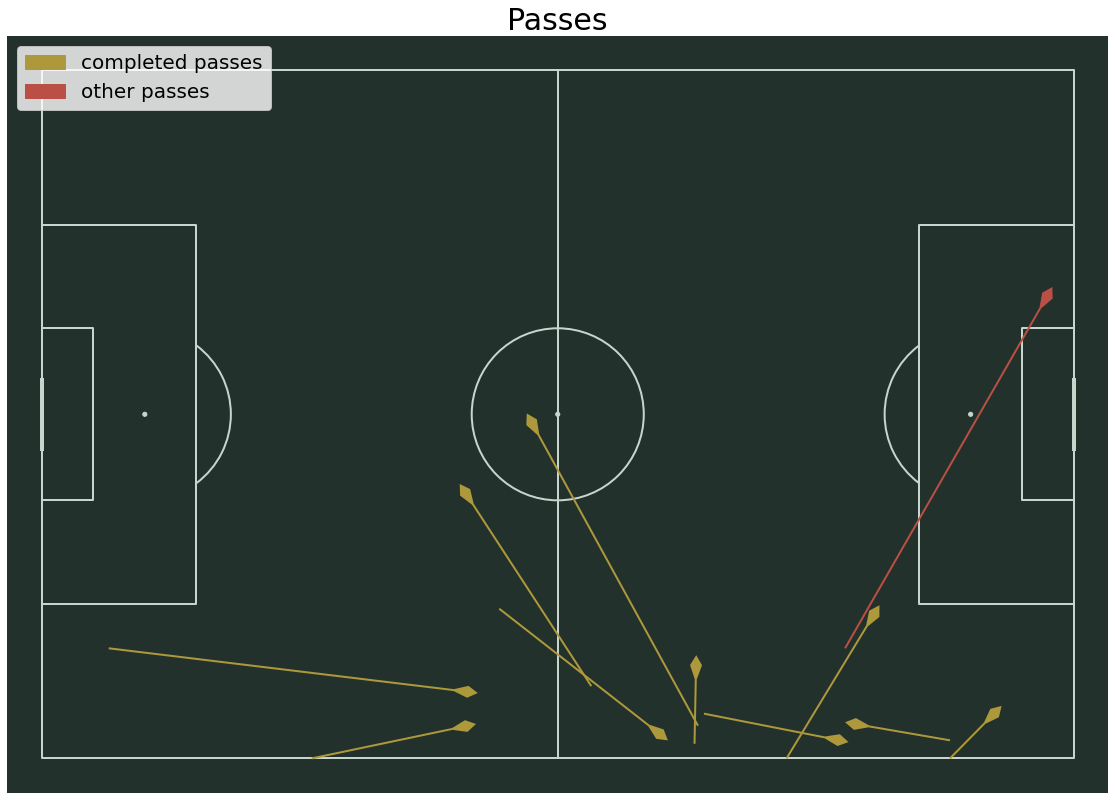

In [27]:
playerpasses('Leah Williamson',wc19)

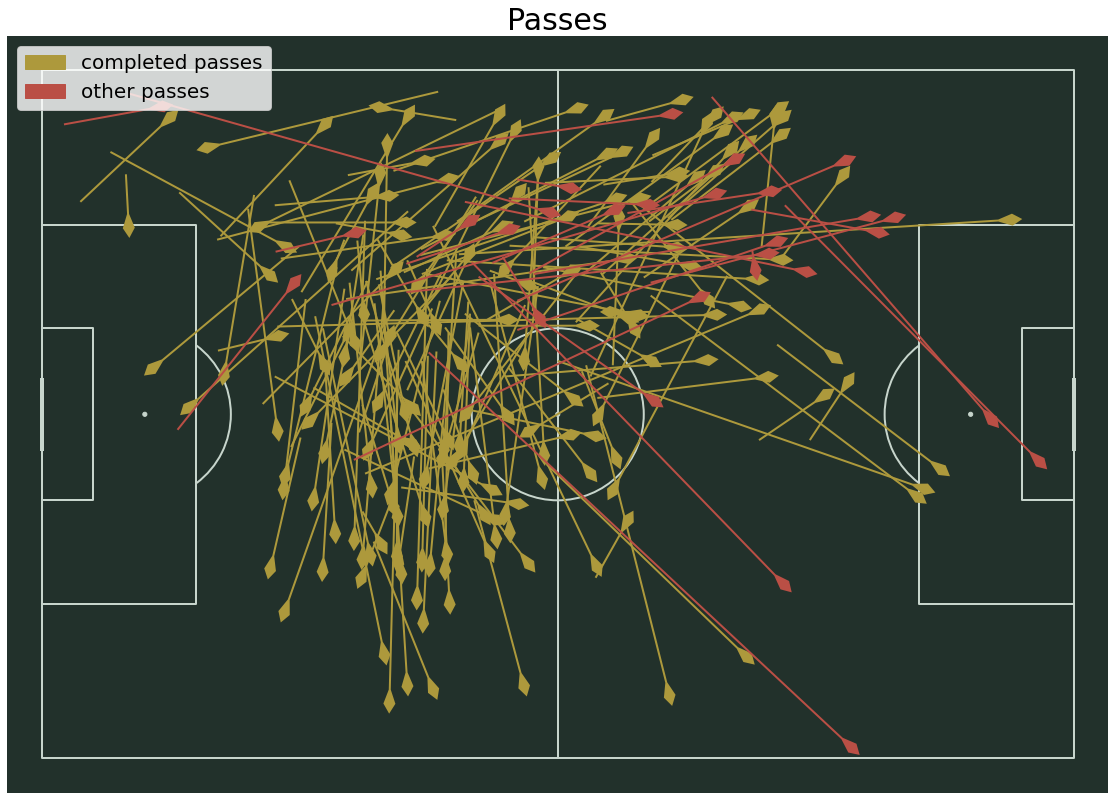

In [28]:
playerpasses('María Pilar León Cebrián',wc19)

### K Means for England Womens WC

In [120]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

In [121]:
# features to use
wcpasses = wc19[(wc19['possession_team_id'] == 865) & 
                  #(wc19['period'] == 1) &
                 (wc19['pass_outcome_Complete'] == 1)][columns_final]

In [122]:
wcpasses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 15323 to 41265
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period                   3199 non-null   int64  
 1   pass_angle               3199 non-null   float64
 2   pass_length              3199 non-null   float64
 3   start_x                  3199 non-null   float64
 4   start_y                  3199 non-null   float64
 5   end_x                    3199 non-null   float64
 6   end_y                    3199 non-null   float64
 7   pass_height_Ground Pass  3199 non-null   uint8  
 8   pass_height_High Pass    3199 non-null   uint8  
 9   pass_height_Low Pass     3199 non-null   uint8  
dtypes: float64(6), int64(1), uint8(3)
memory usage: 209.3 KB


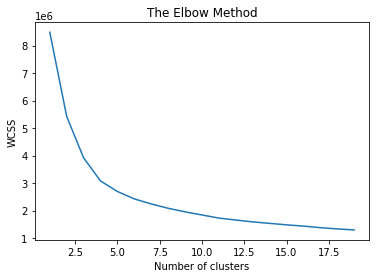

In [123]:
# assessed clusters based on elbow method, however 5 clusters does not provide much insights.
# through trial and error, selected 20 clusters.
X = np.array(wcpasses)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [124]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [125]:
N_clusters = 20
X = np.array(wcpasses)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)
kmeans.fit(X_sc)
cluster_labels = kmeans.predict(X_sc)


In [126]:
kmeans.cluster_centers_

array([[ 0.15457656,  0.27303266,  0.28715552, -0.85554494, -0.55967654,
        -0.75014142, -0.28404052, -1.91930929, -0.34711722,  2.90457883],
       [ 1.08862725,  0.82808751, -0.14701919, -0.86350436, -0.65501926,
        -0.96630787, -0.22982207,  0.52102077, -0.34711722, -0.34428399],
       [-0.91858807,  0.25518353, -0.54606901,  0.96118145, -0.99467342,
         0.93040461, -0.98342068,  0.52102077, -0.34711722, -0.34428399],
       [ 0.11792476, -0.3860517 ,  0.04356821,  0.63218678,  1.05729755,
         0.82104234,  0.69620988, -1.91930929,  2.88087115, -0.34428399],
       [-0.91858807, -1.15029379, -0.39047523, -0.23082928,  1.01204006,
        -0.50673157,  0.57499682,  0.52102077, -0.34711722, -0.34428399],
       [ 0.02683944, -0.43057399, -0.14026819,  0.49340395,  1.15552365,
         0.53572306,  0.94521125, -1.91930929, -0.34711722,  2.90457883],
       [ 0.65277478, -1.13097296, -0.4957033 ,  1.31488566,  1.0670915 ,
         1.03295018,  0.69454652,  0.52102077

In [127]:
wcpasses['n_cluster'] = cluster_labels
wcpasses.head(30)

period  pass_angle  pass_length  start_x  start_y  end_x  end_y  \
15323       1    0.442374     2.102380     60.0     40.0   61.9   40.9   
15324       1    1.769112    21.317833     82.6     37.6   78.4   58.5   
15325       1    0.725767    18.984203     84.7     65.3   98.9   77.9   
15326       1   -1.695151    11.287161     94.7     75.5   93.3   64.3   
15336       1   -0.463648     6.260990      5.2      8.3   10.8    5.5   
15337       1    2.940275     5.001000     10.1      5.2    5.2    6.2   
15338       1   -0.747578    13.090837      9.2     12.5   18.8    3.6   
15339       1    1.316925    54.548420     24.2     12.2   37.9   65.0   
15342       1    0.718830    74.411020     48.3     13.2  104.3   62.2   
15344       1   -2.259721     6.606815     13.9     25.5    9.7   20.4   
15345       1   -0.551031    21.009760     86.1     23.7  104.0   12.7   
15355       1   -1.300771    23.242203      6.0     36.0   12.2   13.6   
15356       1    2.058962    16.417673     12.0     23.9    4.3   38.4   
15357       1    1.886412    10.309219      5.2     38.4    2.0   48.2   
15365       1    2.167707    12.453513     21.6     12.2   14.6   22.5   
15366       1    1.289388    48.612137     14.6     22.5   28.1   69.2   
15367       1   -0.967440    14.451644     29.5     69.0   37.7   57.1   
15368       1    2.279422    12.907362     37.7     57.1   29.3   66.9   
15369       1   -1.836719    26.636253     29.1     66.9   22.1   41.2   
15370       1   -1.275746    31.982027     22.1     41.2   31.4   10.6   
15371       1   -0.450869    13.998928     31.4     10.6   44.0    4.5   
15374       1    1.701404    23.802730      6.0     36.0    2.9   59.6   
15377       1   -2.214297    10.500000      9.9     73.9    3.6   65.5   
15378       1    0.060795    11.521285      3.1     64.8   14.6   65.5   
15379       1    2.233814    13.322537     15.5     63.6    7.3   74.1   
15383       1   -2.828692    10.720541     36.5     80.0   26.3   76.7   
15384       1    0.119429    10.071743     26.3     76.7   36.3   77.9   
15386       1    1.133209    18.878824      5.9     55.9   13.9   73.0   
15387       1   -1.007845    12.179491     13.9     73.0   20.4   62.7   
15388       1    0.927295    19.000000     20.2     62.7   31.6   77.9   

       pass_height_Ground Pass  pass_height_High Pass  pass_height_Low Pass  \
15323                        1                      0                     0   
15324                        1                      0                     0   
15325                        1                      0                     0   
15326                        1                      0                     0   
15336                        1                      0                     0   
15337                        1                      0                     0   
15338                        1                      0                     0   
15339                        0                      1                     0   
15342                        0                      1                     0   
15344                        1                      0                     0   
15345                        1                      0                     0   
15355                        1                      0                     0   
15356                        1                      0                     0   
15357                        1                      0                     0   
15365                        1                      0                     0   
15366                        0                      1                     0   
15367                        1                      0                     0   
15368                        1                      0                     0   
15369                        1                      0                     0   
15370                        1                      0                     0   
15371                        1                      0

In [128]:
wcpasses['n_cluster'].value_counts()

12    215
18    211
8     202
1     201
19    194
14    193
4     189
6     175
2     172
11    169
15    157
10    155
16    154
5     138
13    129
3     122
7     112
17    110
0     101
9     100
Name: n_cluster, dtype: int64

In [129]:
sorted(wcpasses['n_cluster'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [130]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [131]:
centroids

period  pass_angle  pass_length   start_x   start_y     end_x     end_y  \
0   0.154577    0.273033     0.287156 -0.855545 -0.559677 -0.750141 -0.284041   
1   1.088627    0.828088    -0.147019 -0.863504 -0.655019 -0.966308 -0.229822   
2  -0.918588    0.255184    -0.546069  0.961181 -0.994673  0.930405 -0.983421   
3   0.117925   -0.386052     0.043568  0.632187  1.057298  0.821042  0.696210   
4  -0.918588   -1.150294    -0.390475 -0.230829  1.012040 -0.506732  0.574997   
5   0.026839   -0.430574    -0.140268  0.493404  1.155524  0.535723  0.945211   
6   0.652775   -1.130973    -0.495703  1.314886  1.067091  1.032950  0.694547   
7   0.156706    0.221007     2.953893 -0.883894 -0.007398  0.267396  0.580926   
8  -0.918588    0.394022    -0.193827  0.811677  0.741281  0.978993  0.935803   
9   0.024803    0.463334    -0.599814  0.923171 -1.257405  0.806027 -1.133160   
10 -0.866789    0.754877    -0.398654 -0.779566  0.755283 -0.732569  1.144494   
11 -0.918588    1.188892    -0.277053 -0.590072 -1.173863 -0.937999 -0.727754   
12 -0.899916   -0.796395    -0.221415 -0.674080 -0.689040 -0.646485 -1.178267   
13 -0.887468   -0.964033     1.161057 -0.575675  0.659340 -0.737238 -0.575477   
14  1.088627   -0.887984    -0.227966 -0.686409  0.870358 -0.802002  0.397146   
15  1.088627    0.803601    -0.378431  0.913955 -1.236436  0.770894 -1.025617   
16 -0.723080    0.854847     1.103442 -0.675428 -0.487721 -0.658508  0.631279   
17  0.158009    0.357332     0.126745  0.156386 -1.120610  0.406044 -0.879764   
18  1.088627    0.720433    -0.179987  0.471629  0.606484  0.558314  1.055062   
19  1.088627   -0.860006     0.006792  0.111889 -0.460909  0.110460 -1.071528   

    pass_height_Ground Pass  pass_height_High Pass  pass_height_Low Pass  
0                 -1.919309              -0.347117              2.904579  
1                  0.521021              -0.347117             -0.344284  
2                  0.521021              -0.347117             -0.344284  
3                 -1.919309               2.880871             -0.344284  
4                  0.521021              -0.347117             -0.344284  
5                 -1.919309              -0.347117              2.904579  
6                  0.521021              -0.347117             -0.344284  
7                 -1.919309               2.880871             -0.344284  
8                  0.521021              -0.347117             -0.344284  
9                 -1.919309              -0.347117              2.904579  
10                 0.521021              -0.347117             -0.344284  
11                 0.521021              -0.347117             -0.344284  
12                 0.521021              -0.347117             -0.344284  
13                 0.521021              -0.347117             -0.344284  
14                 0.521021              -0.347117             -0.344284  
15                 0.521021              -0.347117             -0.344284  
16                 0.521021              -0.347117             -0.344284  
17                -1.919309               2.880871             -0.344284  
18                 0.521021              -0.347117             -0.344284  
19                 0.521021              -0.347117             -0.344284

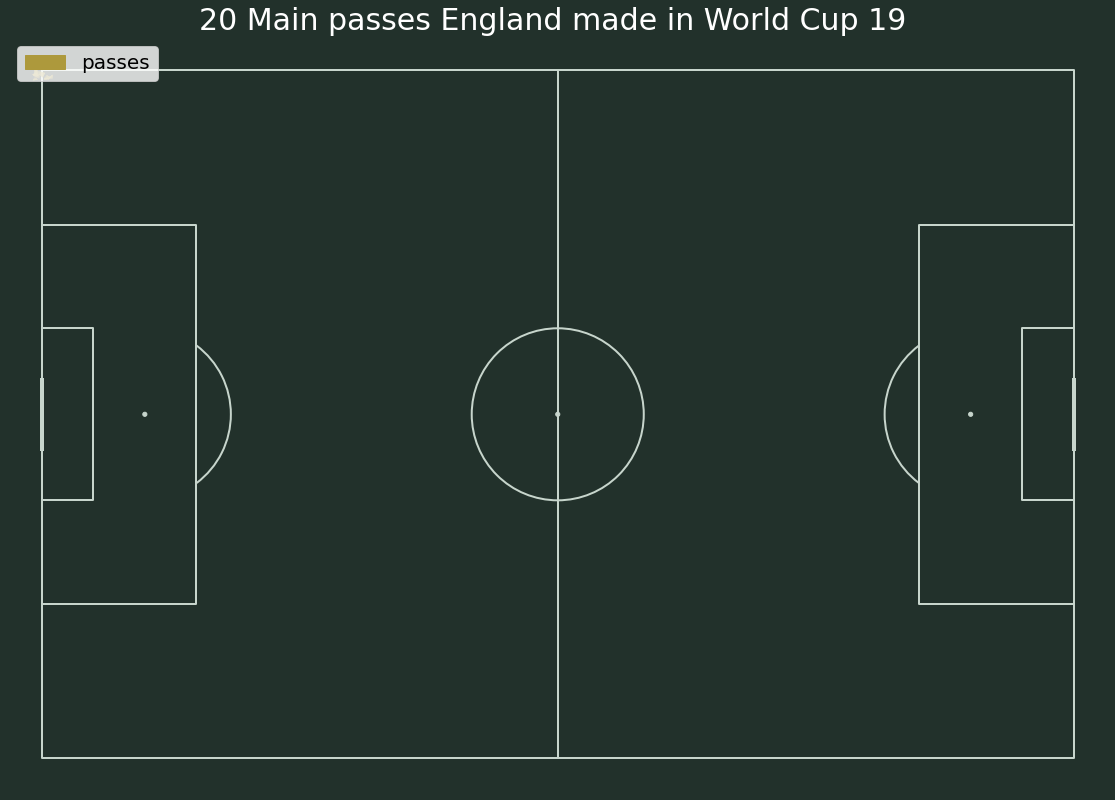

In [132]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'20 centroids based on passes England made in World Cup 19 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [133]:
sorted(wcpasses['n_cluster'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [134]:
wcpasses['n_cluster'].sum()

31248

In [135]:
#passes = euro22[euro22.player == 'Keira Walsh']
wcpasses_0 = wcpasses[wcpasses.n_cluster == 0]
wcpasses_0

period  pass_angle  pass_length  start_x  start_y  end_x  end_y  \
15449       1    1.901892    13.535139     41.4     19.5   37.0   32.3   
15542       1    0.151692    15.882381     47.0     24.8   62.7   27.2   
15630       1    1.981302    42.097507     50.4      8.5   33.6   47.1   
15638       1   -0.768693    29.631908     13.1     32.9   34.4   12.3   
15660       1   -0.567844    41.278080      6.6     31.3   41.4    9.1   
15777       2    0.000000     2.500000     20.1     23.0   22.6   23.0   
15932       2    0.449760    28.982237      6.4     64.2   32.5   76.8   
16053       2    2.546183    11.232987     37.7     31.7   28.4   38.0   
17919       1    2.780587    10.475209     24.5     48.0   14.7   51.7   
17920       1   -2.240053    17.085667     14.7     51.7    4.1   38.3   
17921       1   -0.437469    35.878822      4.1     38.7   36.6   23.5   
17922       1    1.036202    17.664654     36.6     23.5   45.6   38.7   
18006       1   -0.310852    23.212496     24.3     36.7   46.4   29.6   
18051       1    1.641418    31.177717     45.3     19.8   43.1   50.9   
18120       1   -1.346892    10.358571     41.4     13.0   43.7    2.9   
18123       1   -0.211093    14.317822     32.5      7.9   46.5    4.9   
18145       1   -2.681523    24.999400     37.2     28.7   14.8   17.6   
18237       1   -3.118159    12.803515     46.2      4.2   33.4    3.9   
18240       1    0.364735     5.887274     16.0     27.2   21.5   29.3   
18253       1    0.643501    11.500000     35.3      1.0   44.5    7.9   
18254       1   -2.623944     8.285529     44.5      7.4   37.3    3.3   
18257       1    1.209791    41.900837     51.8     27.9   66.6   67.1   
18272       1    0.302885    20.115665     36.3      5.9   55.5   11.9   
18274       1    1.811282    37.787434     46.4     15.3   37.4   52.0   
18307       2    0.186296    19.436306     39.6      1.0   58.7    4.6   
18444       2   -3.079378    30.559122     37.9     28.5    7.4   26.6   
18626       2    1.612095    24.220652     22.3     29.8   21.3   54.0   
18682       2    1.052074    29.247393     30.7     40.1   45.2   65.5   
18743       2    0.674741     8.324061     45.9     40.1   52.4   45.3   
18749       2    1.909120    17.173527     46.9      5.4   41.2   21.6   
19767       1    1.754822    27.870594     16.9     20.5   11.8   47.9   
19827       1    0.962471    13.648443     19.2     68.0   27.0   79.2   
20034       1    1.090201    13.194695     26.1     19.3   32.2   31.0   
20069       1    1.073828     6.711930     28.8     25.8   32.0   31.7   
20071       1   -0.121735    37.880337     17.7     22.2   55.3   17.6   
20520       2    0.272309    27.513815     21.2     31.0   47.7   38.4   
20589       2   -0.282555     6.456005     47.7     45.0   53.9   43.2   
32894       1    1.637860    26.860380     35.8     23.0   34.0   49.8   
32901       1    2.875963    14.094325     56.2     36.1   42.6   39.8   
32974       1    1.352900    42.095367     34.0     19.0   43.1   60.1   
33036       1   -0.717052    47.628773     10.4     36.8   46.3    5.5   
33112       1   -1.570796    13.300000     28.8     40.7   28.8   27.4   
33228       2   -0.488642    17.894133     33.8     31.0   49.6   22.6   
33232       2    1.617105    41.044003     32.0     14.4   30.1   55.4   
33299       2    0.472629    14.937536     40.0     18.5   53.3   25.3   
33303       2    2.594152    17.098831     32.6      1.0   18.0    9.9   
33304       2    1.330305    43.244537     17.6     11.5   27.9   53.5   
33338       2   -0.651347    56.081726      7.5     43.3   52.1    9.3   
33345       2    2.909728     7.397973     36.9     29.1   29.7   30.8   
33417       2   -1.395704    41.331947     67.8     46.5   75.0    5.8   
33427       2   -3.057522    17.863090     46.0     28.0   28.2   26.5   
33522       2    1.245265    33.457138     52.1     33.9   62.8   65.6   
33524       2   -0.053141     9.413288     21.0     23.2   30.4   22.7   
33565      

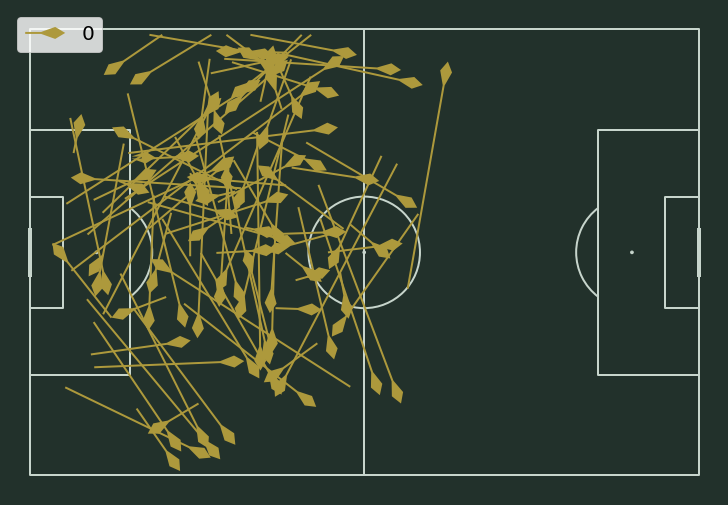

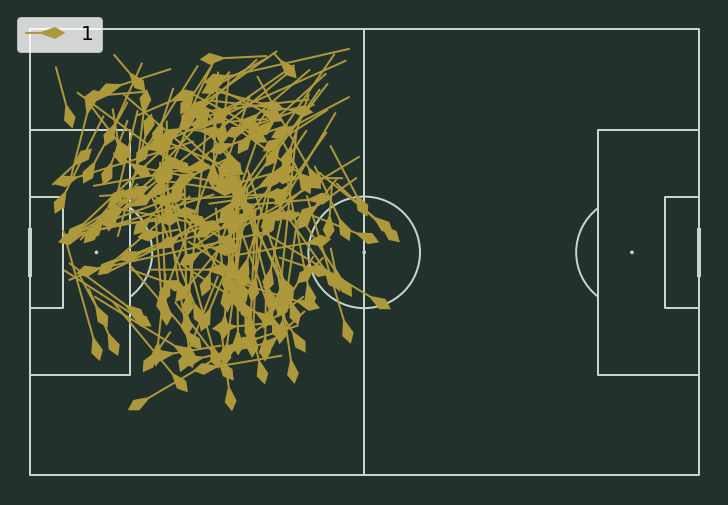

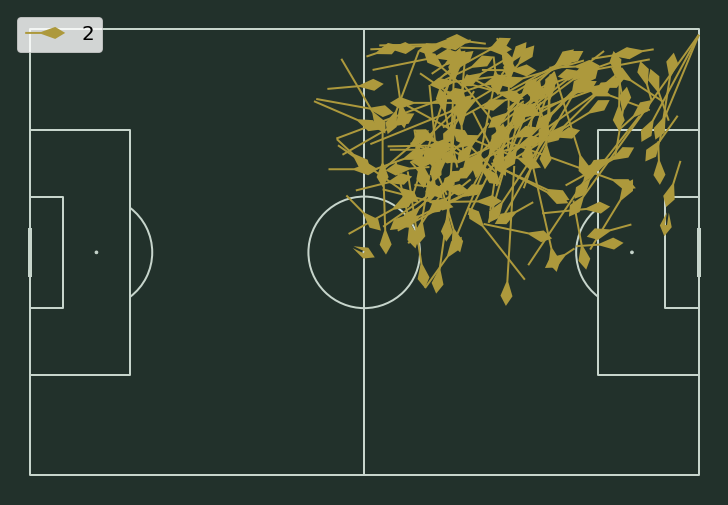

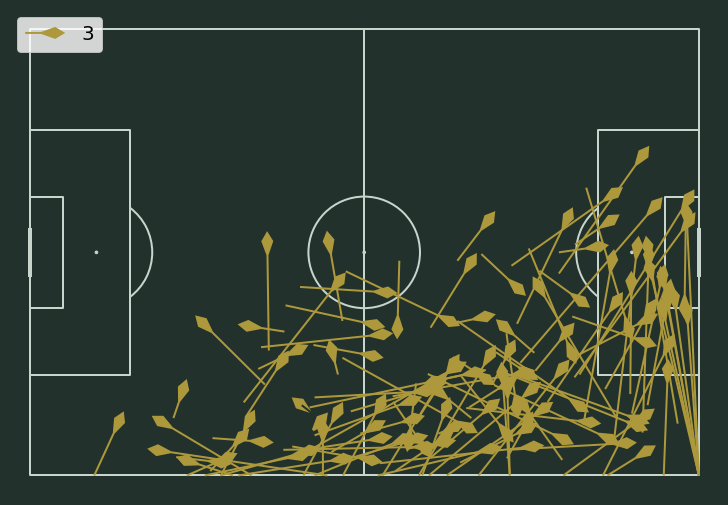

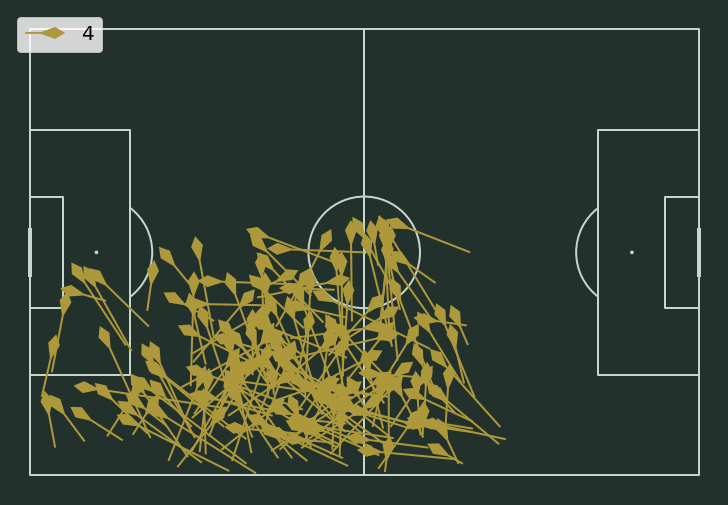

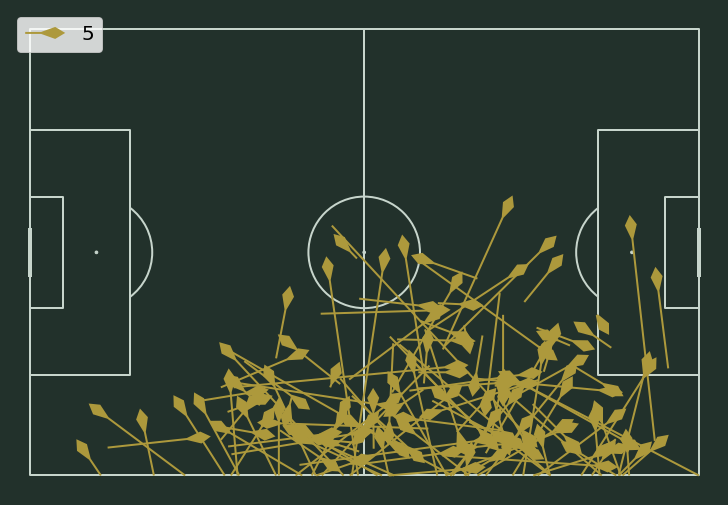

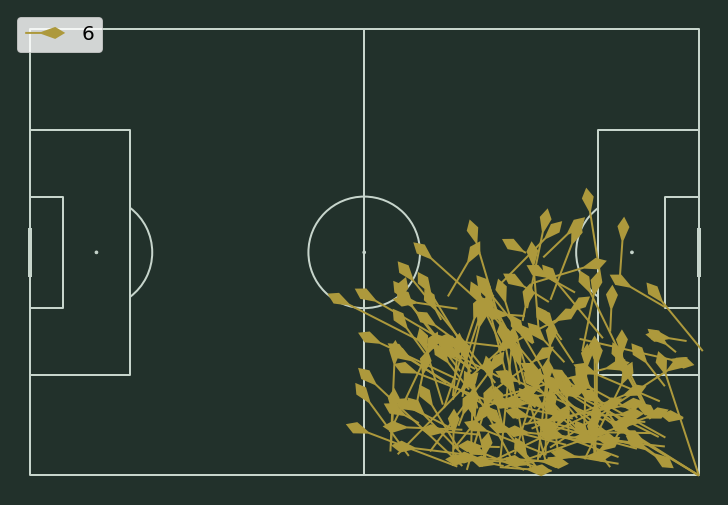

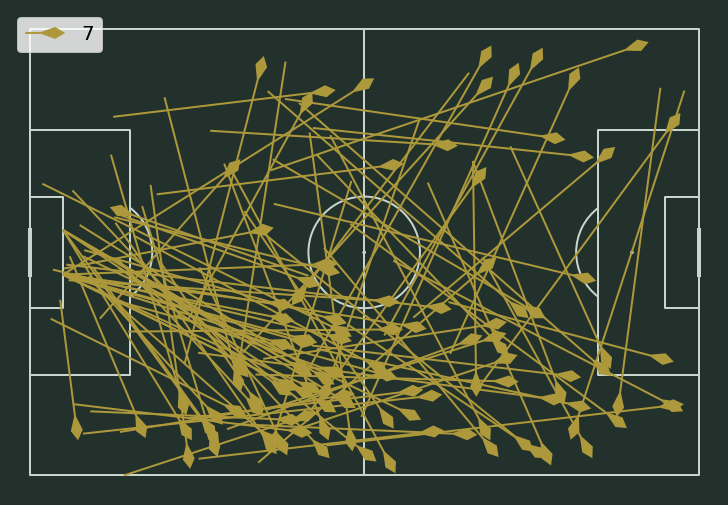

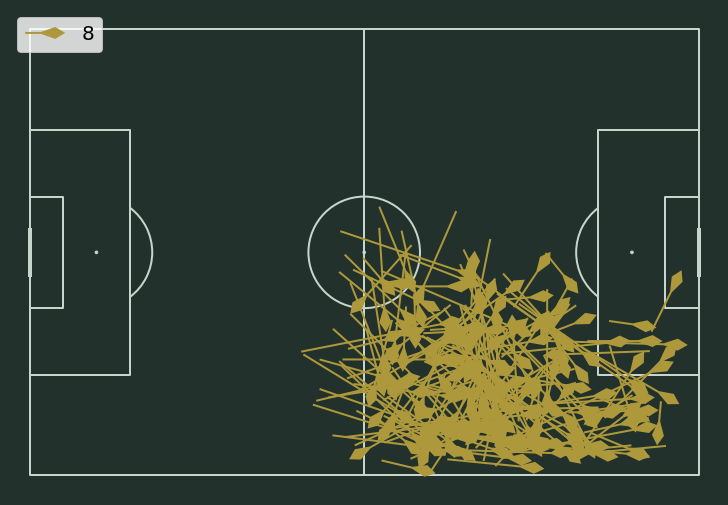

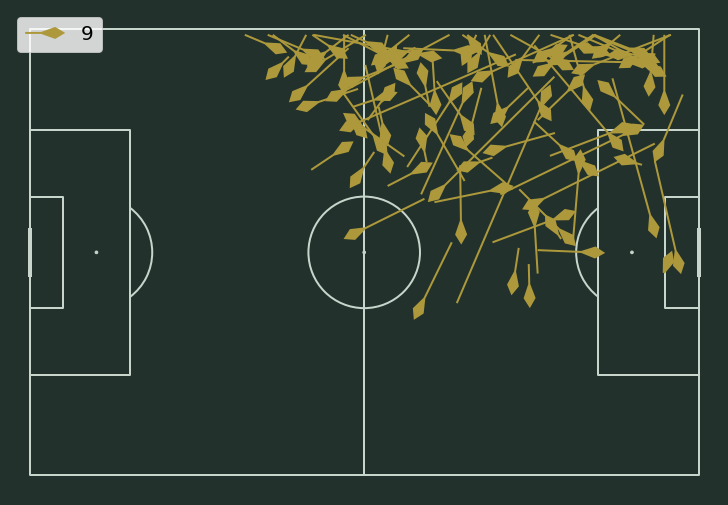

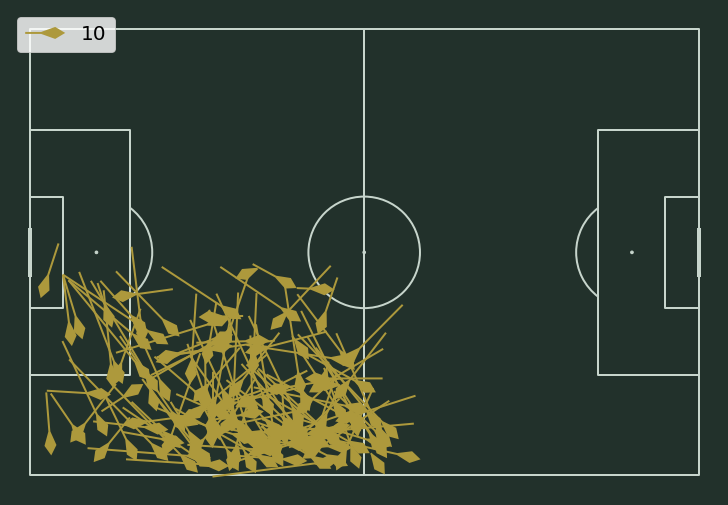

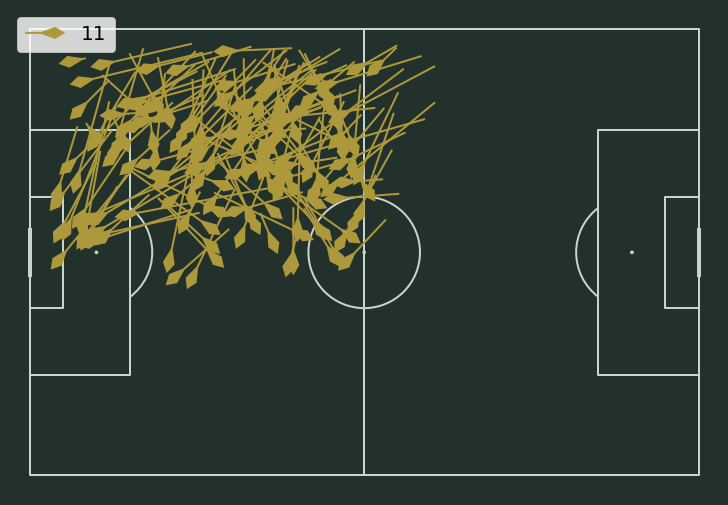

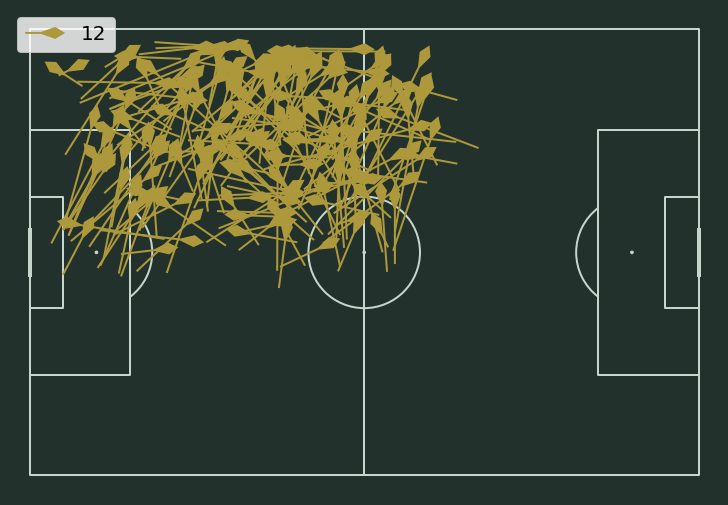

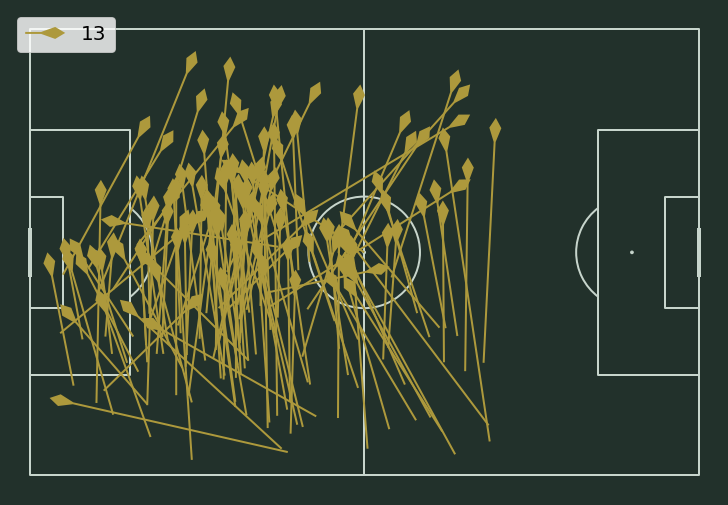

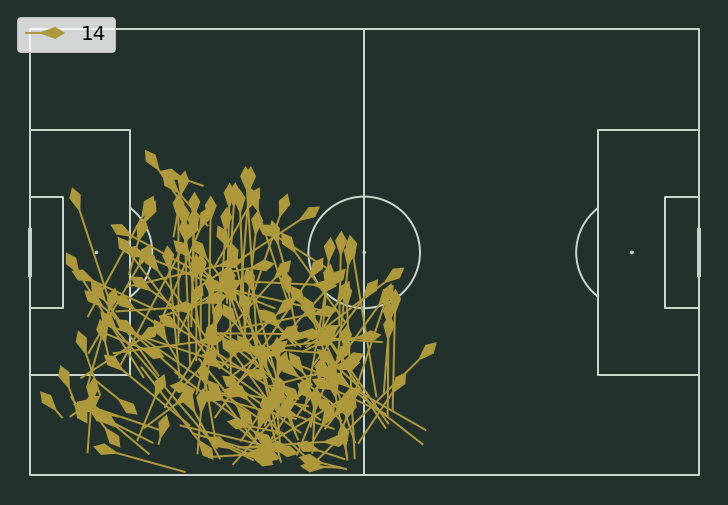

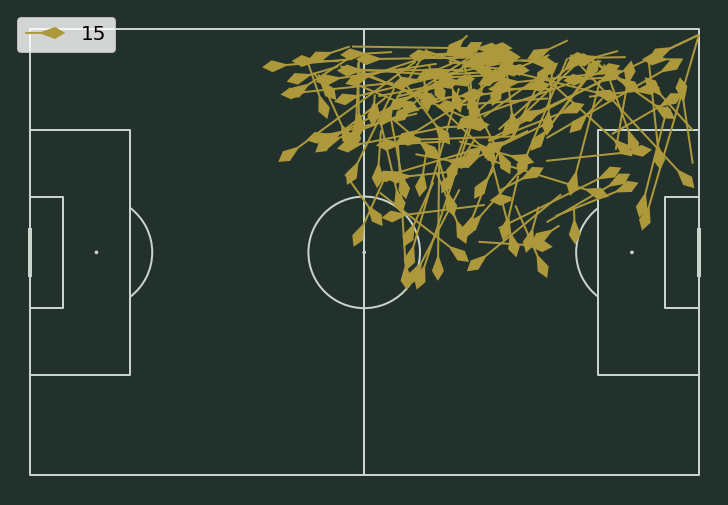

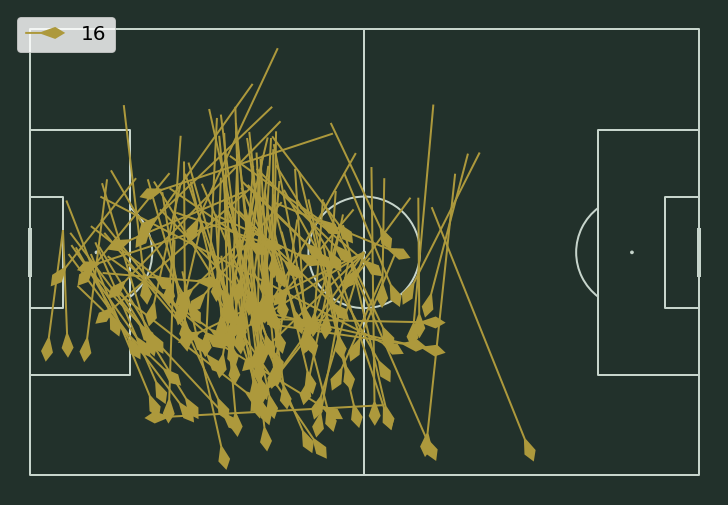

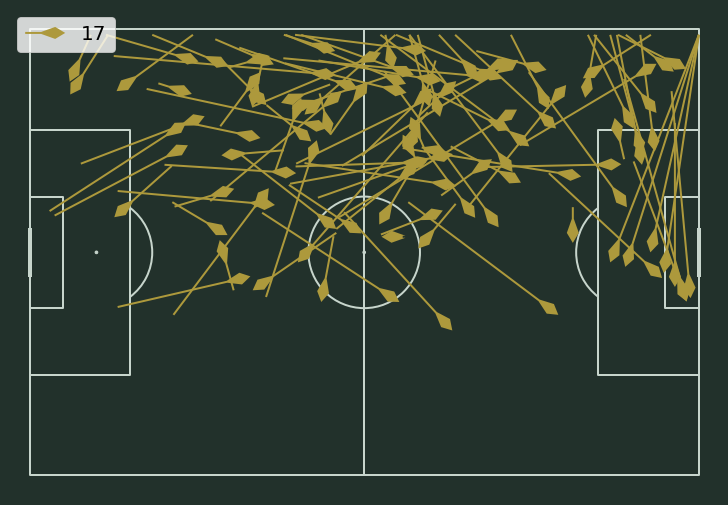

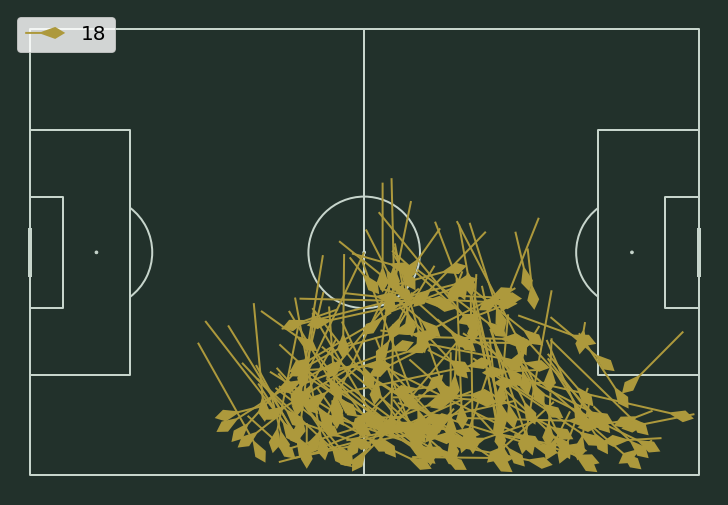

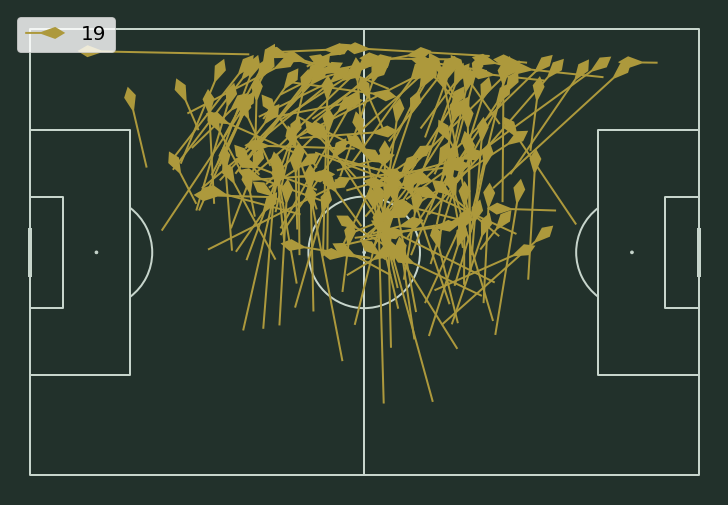

In [136]:
# pulling out passes for analysis by cluster

for c in sorted(wcpasses['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(wcpasses[wcpasses['n_cluster'] == c]['start_x'], 
                      wcpasses[wcpasses['n_cluster'] == c]['start_y'],
                      wcpasses[wcpasses['n_cluster'] == c]['end_x'],
                      wcpasses[wcpasses['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='#ad993c',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
    #.set_title(f'passes, fontsize=30, color = 'white')
# Set the figure facecolor
    fig.set_facecolor('#22312b')

    


In [137]:
def pass_analysis(cluster,df):
    df = df[df.n_cluster == cluster]
    
    analysis = wc19.iloc[df.index]
    
    return analysis

In [138]:
analysis_17 = pass_analysis(17,wcpasses)
analysis_17.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count  110.000000  110.000000   110.000000               110.0    110.000000   
mean     1.536364    0.594804    20.640561               865.0   8565.054545   
std      0.500958    1.137206    10.298591                 0.0   4820.713215   
min      1.000000   -2.063633     3.800000               865.0   4641.000000   
25%      1.000000   -0.215217    11.694675               865.0   4651.000000   
50%      2.000000    0.469956    18.772292               865.0  10172.000000   
75%      2.000000    1.338763    28.392697               865.0  10252.000000   
max      2.000000    3.141593    43.788696               865.0  26093.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    110.000000                  110.0                    110.0   
mean   55951.600000                    1.0                      0.0   
std    20769.297967                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    22962.000000                    1.0                      0.0   
50%    68362.000000                    1.0                      0.0   
75%    69258.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          110.0             110.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      110.0                 110.0  110.000000   
mean                         0.0                   0.0   60.415455   
std                          0.0                   0.0   29.888438   
min                          0.0                   0.0    3.600000   
25%                          0.0                   0.0   40.350000   
50%                          0.0                   0.0   56.200000   
75%                          0.0                   0.0   76.100000   
max                          0.0                   0.0  120.000000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  110.000000  110.000000  110.000000                    110.0   
mean    15.937273   70.618182   22.011818                      0.0   
std     13.801189   28.222742   13.623756                      0.0   
min      1.000000    7.200000    3.900000                      0.0   
25%      1.000000   48.250000   10.625000                      0.0   
50%     14.400000   70.400000   18.900000                      0.0   
75%     25.150000   93.000000   32.350000                      0.0   
max     51.200000  118.500000   54.000000                      0.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  110.0                 110.0  
mean                     1.0                   0.0  
std                      0.0                   0.0  
min                      1.0                   0.0  
25%                      1.0                   0.0  
50%                      1.0                   0.0  
75%                      1.0                   0.0  
max                      1.0                   0.0

In [139]:
analysis_17.match_id.value_counts()

68337    20
69301    20
22962    20
69199    14
69258    14
22936    11
68362    11
Name: match_id, dtype: int64

In [140]:
analysis_17.player.value_counts()

Demi Stokes                  23
Alex Greenwood               22
Jill Scott                    7
Millie Bright                 7
Abbie McManus                 6
Toni Duggan                   6
Stephanie Houghton            5
Jade Moore                    4
Bethany Mead                  4
Keira Walsh                   3
Lindsey Michelle Horan        3
Francesca Kirby               3
Nikita Parris                 2
Jodie Taylor                  2
Ellen White                   1
Carly Mitchell Telford        1
Estelle Johnson               1
Georgia Stanway               1
Jennifer Patricia Beattie     1
Karen Bardsley                1
Kelley Maureen O''Hara        1
Lucy Bronze                   1
Karen Julia Carney            1
Jun Endo                      1
Yvonne Patrice Leuko          1
Gun Nathalie Björn            1
Jeannette Yango               1
Name: player, dtype: int64

In [141]:
analysis_17.pass_recipient.value_counts()

Ellen White                     20
Francesca Kirby                 18
Nikita Parris                   10
Bethany Mead                     8
Toni Duggan                      7
Jill Scott                       7
Stephanie Houghton               5
Karen Julia Carney               4
Jodie Taylor                     4
Millie Bright                    4
Jade Moore                       3
Keira Walsh                      3
Abbie McManus                    2
Demi Stokes                      2
Lina Mona Andréa Hurtig          1
Yvonne Patrice Leuko             1
Emi Nakajima                     1
Rebecca Elizabeth Sauerbrunn     1
Georgia Stanway                  1
Alex Greenwood                   1
Rachel Daly                      1
Christen Annemarie Press         1
Alexandra Morgan Carrasco        1
Therese Ninon Abena              1
Gabrielle Onguene                1
Christie Murray                  1
Lindsey Michelle Horan           1
Name: pass_recipient, dtype: int64

In [142]:
analysis_2 = pass_analysis(2,wcpasses)
analysis_2.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count   172.0  172.000000   172.000000               172.0    172.000000   
mean      1.0    0.424166    13.628053               865.0   8302.476744   
std       0.0    1.521125     5.693072                 0.0   4078.355800   
min       1.0   -3.015505     2.022375               865.0   4641.000000   
25%       1.0   -0.653474     9.565166               865.0   4648.000000   
50%       1.0    0.193135    12.667081               865.0  10172.000000   
75%       1.0    1.713483    16.104184               865.0  10190.000000   
max       1.0    3.141593    40.070564               865.0  25626.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    172.000000                  172.0                    172.0   
mean   47267.511628                    1.0                      0.0   
std    23013.938308                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    22936.000000                    1.0                      0.0   
50%    68337.000000                    1.0                      0.0   
75%    69199.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          172.0             172.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      172.0                 172.0  172.000000   
mean                         0.0                   0.0   81.886047   
std                          0.0                   0.0   16.153164   
min                          0.0                   0.0   51.000000   
25%                          0.0                   0.0   70.600000   
50%                          0.0                   0.0   81.250000   
75%                          0.0                   0.0   90.425000   
max                          0.0                   0.0  120.000000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  172.000000  172.000000  172.000000                    172.0   
mean    18.898256   84.852326   19.606977                      1.0   
std     10.475382   14.166836   11.792800                      0.0   
min      1.000000   61.200000    1.600000                      1.0   
25%     10.000000   73.950000    9.375000                      1.0   
50%     19.150000   83.450000   18.700000                      1.0   
75%     25.425000   95.175000   27.900000                      1.0   
max     46.400000  115.500000   49.600000                      1.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  172.0                 172.0  
mean                     0.0                   0.0  
std                      0.0                   0.0  
min                      0.0                   0.0  
25%                      0.0                   0.0  
50%                      0.0                   0.0  
75%                      0.0                   0.0  
max                      0.0                   0.0

In [143]:
analysis_2.player.value_counts()

Francesca Kirby            23
Alex Greenwood             21
Toni Duggan                20
Demi Stokes                19
Bethany Mead               17
Ellen White                16
Abbie McManus              16
Keira Walsh                12
Millie Bright               7
Jade Moore                  6
Jill Scott                  6
Nikita Parris               2
Lucy Bronze                 1
Raissa Feudjio Tchuanyo     1
Stephanie Houghton          1
Georgia Stanway             1
Vilde Bøe Risa              1
Lindsey Michelle Horan      1
Sara Caroline Seger         1
Name: player, dtype: int64

In [144]:
analysis_2.pass_recipient.value_counts()

Francesca Kirby              26
Alex Greenwood               22
Bethany Mead                 22
Keira Walsh                  20
Toni Duggan                  20
Demi Stokes                  14
Ellen White                  11
Jade Moore                   10
Jill Scott                    9
Nikita Parris                 4
Abbie McManus                 4
Georgia Stanway               2
Lucy Bronze                   2
Guro Reiten                   1
Michaela Abam                 1
Fridolina Rolfö               1
Jodie Taylor                  1
Alexandra Morgan Carrasco     1
Stephanie Houghton            1
Name: pass_recipient, dtype: int64

In [145]:
analysis_7 = pass_analysis(7,wcpasses)
analysis_7.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count  112.000000  112.000000   112.000000               112.0    112.000000   
mean     1.535714    0.367075    50.106928               865.0  10193.544643   
std      0.500964    0.797652     9.822632                 0.0   4773.898309   
min      1.000000   -2.808927    25.402363               865.0   4633.000000   
25%      1.000000   -0.057477    42.928416               865.0   4658.000000   
50%      2.000000    0.386050    49.094729               865.0  10178.000000   
75%      2.000000    0.891644    57.039368               865.0  10190.000000   
max      2.000000    2.222307    74.411020               865.0  25766.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    112.000000                  112.0                    112.0   
mean   63933.714286                    1.0                      0.0   
std    14266.396052                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    68337.000000                    1.0                      0.0   
50%    68362.000000                    1.0                      0.0   
75%    69258.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          112.0             112.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      112.0                 112.0  112.000000   
mean                         0.0                   0.0   32.662500   
std                          0.0                   0.0   25.639335   
min                          0.0                   0.0    2.300000   
25%                          0.0                   0.0    9.600000   
50%                          0.0                   0.0   28.450000   
75%                          0.0                   0.0   50.225000   
max                          0.0                   0.0  117.400000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  112.000000  112.000000  112.000000                    112.0   
mean    42.110714   66.854464   55.900000                      0.0   
std     17.715852   25.178648   21.341057                      0.0   
min      5.800000    8.700000    2.300000                      0.0   
25%     29.425000   48.100000   50.050000                      0.0   
50%     42.700000   62.000000   62.900000                      0.0   
75%     52.525000   87.550000   71.050000                      0.0   
max     80.000000  117.300000   79.600000                      0.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  112.0                 112.0  
mean                     1.0                   0.0  
std                      0.0                   0.0  
min                      1.0                   0.0  
25%                      1.0                   0.0  
50%                      1.0                   0.0  
75%                      1.0                   0.0  
max                      1.0                   0.0

In [146]:
analysis_7.player.value_counts()

Karen Bardsley              23
Stephanie Houghton          20
Carly Mitchell Telford      12
Millie Bright               11
Keira Walsh                  9
Lucy Bronze                  7
Jade Moore                   7
Alex Greenwood               4
Francesca Kirby              4
Jill Scott                   2
Toni Duggan                  2
Abbie McManus                2
Demi Stokes                  2
Bethany Mead                 1
Karen Julia Carney           1
Leah Williamson              1
Vanina Noemí Correa          1
Magdalena Lilly Eriksson     1
Ingrid Hjelmseth             1
Nana Ichise                  1
Name: player, dtype: int64

In [147]:
analysis_7.pass_recipient.value_counts()

Lucy Bronze            24
Nikita Parris          19
Jill Scott             15
Ellen White            14
Rachel Daly            10
Bethany Mead            8
Jodie Taylor            3
Stephanie Houghton      3
Francesca Kirby         3
Karen Julia Carney      2
Toni Duggan             2
Jade Moore              1
Karen Bardsley          1
Eva Sofia Jakobsson     1
Linda Ruth Bravo        1
Demi Stokes             1
Alex Greenwood          1
Karina Sævik            1
Yuika Sugasawa          1
Millie Bright           1
Name: pass_recipient, dtype: int64

In [148]:
analysis_13 = pass_analysis(13,wcpasses)
analysis_13.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count  129.000000  129.000000   129.000000               129.0    129.000000   
mean     1.015504   -1.612521    31.420831               865.0   9425.069767   
std      0.124027    0.423275     7.837610                 0.0   2981.476093   
min      1.000000   -2.988707    18.514858               865.0   4636.000000   
25%      1.000000   -1.779956    25.173399               865.0  10178.000000   
50%      1.000000   -1.629288    29.964312               865.0  10185.000000   
75%      1.000000   -1.477589    37.305230               865.0  10185.000000   
max      2.000000   -0.206121    56.923195               865.0  19421.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    129.000000                  129.0                    129.0   
mean   59587.883721                    1.0                      0.0   
std    18483.735757                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    68337.000000                    1.0                      0.0   
50%    68362.000000                    1.0                      0.0   
75%    69258.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          129.0             129.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      129.0                 129.0  129.000000   
mean                         0.0                   0.0   40.885271   
std                          0.0                   0.0   18.391490   
min                          0.0                   0.0    5.500000   
25%                          0.0                   0.0   28.000000   
50%                          0.0                   0.0   38.900000   
75%                          0.0                   0.0   50.300000   
max                          0.0                   0.0   82.500000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  129.000000  129.000000  129.000000                    129.0   
mean    57.786822   39.582946   29.071318                      1.0   
std      9.728834   18.626242   10.719952                      0.0   
min     36.200000    3.200000    3.900000                      1.0   
25%     51.000000   27.000000   23.300000                      1.0   
50%     58.200000   38.000000   29.600000                      1.0   
75%     64.800000   52.100000   36.800000                      1.0   
max     77.200000   83.600000   66.100000                      1.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  129.0                 129.0  
mean                     0.0                   0.0  
std                      0.0                   0.0  
min                      0.0                   0.0  
25%                      0.0                   0.0  
50%                      0.0                   0.0  
75%                      0.0                   0.0  
max                      0.0                   0.0

In [149]:
analysis_13.match_id.value_counts()

68362    27
69258    23
69199    22
68337    20
22962    14
22936    12
69301    11
Name: match_id, dtype: int64

In [150]:
analysis_13.player.value_counts()

Stephanie Houghton           78
Lucy Bronze                  14
Keira Walsh                   9
Millie Bright                 9
Carly Mitchell Telford        4
Jill Scott                    4
Nikita Parris                 3
Abbie McManus                 3
Ellen White                   1
Maria Thorisdottir            1
Rosemary Kathleen Lavelle     1
Karen Bardsley                1
Leah Williamson               1
Name: player, dtype: int64

In [151]:
analysis_13.pass_recipient.value_counts()

Millie Bright             60
Abbie McManus             18
Demi Stokes               11
Karen Bardsley            11
Alex Greenwood            10
Toni Duggan                4
Keira Walsh                4
Carly Mitchell Telford     2
Francesca Kirby            2
Jade Moore                 2
Isabell Herlovsen          1
Nikita Parris              1
Ellen White                1
Stephanie Houghton         1
Lindsey Michelle Horan     1
Name: pass_recipient, dtype: int64

In [152]:
analysis_4 = pass_analysis(4,wcpasses)
analysis_4.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count   189.0  189.000000   189.000000               189.0    189.000000   
mean      1.0   -1.923669    15.249752               865.0   8803.518519   
std       0.0    0.771948     4.613807                 0.0   3058.578926   
min       1.0   -3.121595     5.315073               865.0   4641.000000   
25%       1.0   -2.525973    11.640018               865.0   5058.000000   
50%       1.0   -1.994025    15.062868               865.0  10178.000000   
75%       1.0   -1.428899    18.254314               865.0  10178.000000   
max       1.0   -0.129219    28.001785               865.0  25766.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    189.000000                  189.0                    189.0   
mean   57928.740741                    1.0                      0.0   
std    19608.741972                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    68337.000000                    1.0                      0.0   
50%    68362.000000                    1.0                      0.0   
75%    69258.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          189.0             189.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      189.0                 189.0  189.000000   
mean                         0.0                   0.0   50.085185   
std                          0.0                   0.0   17.733767   
min                          0.0                   0.0    2.200000   
25%                          0.0                   0.0   38.900000   
50%                          0.0                   0.0   50.300000   
75%                          0.0                   0.0   63.400000   
max                          0.0                   0.0   85.400000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  189.000000  189.000000  189.000000                    189.0   
mean    66.079365   45.840212   55.762434                      1.0   
std      9.556108   17.897087   10.641544                      0.0   
min     40.000000    2.700000   33.300000                      1.0   
25%     59.700000   35.000000   47.500000                      1.0   
50%     69.100000   46.200000   57.600000                      1.0   
75%     73.300000   60.000000   63.900000                      1.0   
max     79.600000   75.500000   75.400000                      1.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  189.0                 189.0  
mean                     0.0                   0.0  
std                      0.0                   0.0  
min                      0.0                   0.0  
25%                      0.0                   0.0  
50%                      0.0                   0.0  
75%                      0.0                   0.0  
max                      0.0                   0.0

In [153]:
analysis_4.match_id.value_counts()

68337    36
69258    31
69301    28
22962    27
68362    27
69199    22
22936    18
Name: match_id, dtype: int64

In [154]:
analysis_4.player.value_counts()

Lucy Bronze                     80
Stephanie Houghton              35
Nikita Parris                   22
Rachel Daly                     17
Keira Walsh                      9
Jill Scott                       9
Jade Moore                       3
Ellen White                      3
Francesca Kirby                  2
Claire Emslie                    1
Bethany Mead                     1
Demi Stokes                      1
Nana Ichise                      1
Abbie McManus                    1
Georgia Stanway                  1
Rebecca Elizabeth Sauerbrunn     1
Toni Duggan                      1
Karina Sævik                     1
Name: player, dtype: int64

In [155]:
analysis_4.pass_recipient.value_counts()

Stephanie Houghton        55
Jill Scott                28
Millie Bright             18
Lucy Bronze               18
Keira Walsh               17
Abbie McManus             16
Francesca Kirby            7
Jade Moore                 6
Nikita Parris              6
Georgia Stanway            4
Karen Bardsley             3
Ellen White                3
Ayaka Yamashita            1
Bethany Mead               1
Alyssa Michele Naeher      1
Vilde Bøe Risa             1
Demi Stokes                1
Jodie Taylor               1
Kim Little                 1
Carly Mitchell Telford     1
Name: pass_recipient, dtype: int64

In [156]:
analysis_7 = pass_analysis(7,wcpasses)
analysis_7.describe()

period  pass_angle  pass_length  possession_team_id     player_id  \
count  112.000000  112.000000   112.000000               112.0    112.000000   
mean     1.535714    0.367075    50.106928               865.0  10193.544643   
std      0.500964    0.797652     9.822632                 0.0   4773.898309   
min      1.000000   -2.808927    25.402363               865.0   4633.000000   
25%      1.000000   -0.057477    42.928416               865.0   4658.000000   
50%      2.000000    0.386050    49.094729               865.0  10178.000000   
75%      2.000000    0.891644    57.039368               865.0  10190.000000   
max      2.000000    2.222307    74.411020               865.0  25766.000000   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count    112.000000                  112.0                    112.0   
mean   63933.714286                    1.0                      0.0   
std    14266.396052                    0.0                      0.0   
min    22936.000000                    1.0                      0.0   
25%    68337.000000                    1.0                      0.0   
50%    68362.000000                    1.0                      0.0   
75%    69258.000000                    1.0                      0.0   
max    69301.000000                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                          112.0             112.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown     start_x  \
count                      112.0                 112.0  112.000000   
mean                         0.0                   0.0   32.662500   
std                          0.0                   0.0   25.639335   
min                          0.0                   0.0    2.300000   
25%                          0.0                   0.0    9.600000   
50%                          0.0                   0.0   28.450000   
75%                          0.0                   0.0   50.225000   
max                          0.0                   0.0  117.400000   

          start_y       end_x       end_y  pass_height_Ground Pass  \
count  112.000000  112.000000  112.000000                    112.0   
mean    42.110714   66.854464   55.900000                      0.0   
std     17.715852   25.178648   21.341057                      0.0   
min      5.800000    8.700000    2.300000                      0.0   
25%     29.425000   48.100000   50.050000                      0.0   
50%     42.700000   62.000000   62.900000                      0.0   
75%     52.525000   87.550000   71.050000                      0.0   
max     80.000000  117.300000   79.600000                      0.0   

       pass_height_High Pass  pass_height_Low Pass  
count                  112.0                 112.0  
mean                     1.0                   0.0  
std                      0.0                   0.0  
min                      1.0                   0.0  
25%                      1.0                   0.0  
50%                      1.0                   0.0  
75%                      1.0                   0.0  
max                      1.0                   0.0

In [157]:
analysis_7.match_id.value_counts()

68337    25
69301    23
69258    20
68362    20
69199    12
22962     8
22936     4
Name: match_id, dtype: int64

In [158]:
analysis_7.player.value_counts()

Karen Bardsley              23
Stephanie Houghton          20
Carly Mitchell Telford      12
Millie Bright               11
Keira Walsh                  9
Lucy Bronze                  7
Jade Moore                   7
Alex Greenwood               4
Francesca Kirby              4
Jill Scott                   2
Toni Duggan                  2
Abbie McManus                2
Demi Stokes                  2
Bethany Mead                 1
Karen Julia Carney           1
Leah Williamson              1
Vanina Noemí Correa          1
Magdalena Lilly Eriksson     1
Ingrid Hjelmseth             1
Nana Ichise                  1
Name: player, dtype: int64

In [159]:
analysis_7.pass_recipient.value_counts()

Lucy Bronze            24
Nikita Parris          19
Jill Scott             15
Ellen White            14
Rachel Daly            10
Bethany Mead            8
Jodie Taylor            3
Stephanie Houghton      3
Francesca Kirby         3
Karen Julia Carney      2
Toni Duggan             2
Jade Moore              1
Karen Bardsley          1
Eva Sofia Jakobsson     1
Linda Ruth Bravo        1
Demi Stokes             1
Alex Greenwood          1
Karina Sævik            1
Yuika Sugasawa          1
Millie Bright           1
Name: pass_recipient, dtype: int64

In [160]:
silhouette_score(X, cluster_labels)

-0.06307195677816123

### DBScan

In [161]:
X_1 = np.array(pd_plot[columns_final])

NameError: name 'pd_plot' is not defined

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

dbscan = DBSCAN()
dbscan.fit(X_scaled);